In [39]:
from functools import partial
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
sys.path.append('/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/DATA_SCIENCE/CODE_REPOSITORY')

In [4]:
from linear_algebra import *

(3, 5)
2
int64
8
15
<type 'numpy.ndarray'>
[  0   1   8  27  64 125 216 343 512 729]
[1000    1 1000   27 1000  125  216  343  512  729]
[ 729  512  343  216  125 1000   27 1000    1 1000]
[[ 9.  3.  1.  3.]
 [ 7.  0.  3.  8.]
 [ 8.  2.  9.  4.]]
[ 9.  3.  1.  3.  7.  0.  3.  8.  8.  2.  9.  4.]
[[ 1.  7.  7.  5.]
 [ 3.  4.  0.  6.]
 [ 1.  9.  2.  5.]]
[[ 1.  7.  7.]
 [ 5.  3.  4.]
 [ 0.  6.  1.]
 [ 9.  2.  5.]]
[[ 1.  7.  7.]
 [ 5.  3.  4.]
 [ 0.  6.  1.]
 [ 9.  2.  5.]]
[[ 4.  6.  4.  1.  2.  9.  9.  0.  0.  5.  0.  5.]
 [ 8.  4.  6.  5.  9.  4.  6.  2.  3.  0.  8.  6.]]
[array([[ 4.,  6.,  4.,  1.],
       [ 8.,  4.,  6.,  5.]]), array([[ 2.,  9.,  9.,  0.],
       [ 9.,  4.,  6.,  2.]]), array([[ 0.,  5.,  0.,  5.],
       [ 3.,  0.,  8.,  6.]])]
[array([[ 4.,  6.,  4.,  1.,  2.,  9.,  9.,  0.,  0.,  5.,  0.,  5.]]), array([[ 8.,  4.,  6.,  5.,  9.,  4.,  6.,  2.,  3.,  0.,  8.,  6.]])]
[array([[ 4.,  6.,  4.],
       [ 8.,  4.,  6.]]), array([[ 1.],
       [ 5.]]), array([[ 2.,  9

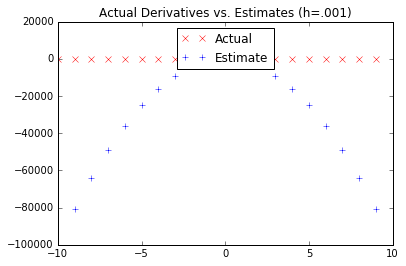

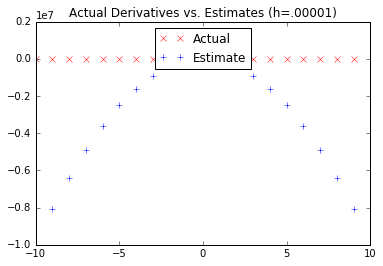

In [40]:
# DERIVATIVE, SLOPE
def sum_of_squares(v):
    return sum(v_i**2 for v_i in v)
    # goal: maximizing/minimizing a cost function such as this one.
    # method: pick a random starting point, compute the gradient, 
    #    take a small step in the direction of the gradient, repeat with new starting point.
def difference_quotient(f, x, h):
    return (f(x+h) - f(x) / h)
    # quotient: slope of the non-quite-tangent line.
    #    as h reaches 0, the line gets infinitely close to tangent.
def square(x): return x*x
def derivative(x): return 2*x # derivative of x^2 is 2x. NB: we are dealing with sum of squares, so...
derivative_estimate = partial(difference_quotient, square, h=.001)
x = range(-10,10)
plt.title('Actual Derivatives vs. Estimates (h=.001)')
plt.plot(x, map(derivative, x), 'rx', label='Actual') # red x.
plt.plot(x, map(derivative_estimate, x), 'b+', label='Estimate') # blue +.
plt.legend(loc=9) # top center.
plt.show()
derivative_estimate = partial(difference_quotient, square, h=.00001)
x = range(-10,10)
plt.title('Actual Derivatives vs. Estimates (h=.00001)')
plt.plot(x, map(derivative, x), 'rx', label='Actual') # red x.
plt.plot(x, map(derivative_estimate, x), 'b+', label='Estimate') # blue +.
plt.legend(loc=9) # top center.
plt.show()
## NB: in the second graph, the y distances between actual and estimate are much smaller!

In [41]:
# PARTIAL DERIVATIVE
def partial_difference_quotient(f, v, i, h):
    w = [v_j + (h if j==i else 0) for j, v_j in enumerate(v)]
    return (f(w)-f(v)) / h
    # partial derivative: only wrt. the ith variable.
    # input change only happens to the ith variable, while other vars held fixed.
def estimate_gradient(f, v, h=.00001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]

In [42]:
# FIND THE MINIMUM
#    x+ if grad=neg; x- if grad=pos.
#    DEMO: smallest 3D vector.
def step(v, direction, stepSize): # direction = gradient.
    return [v_i + stepSize * direction_i for v_i, direction_i in zip(v, direction)]
    # step function returns the x value after movement based on f(x).
def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]
v = [random.randint(-10,10) for i in range(3)] # generate random 3D vector (val=[-10,10]).
tolerance = .0000001 # if the value change < tolerance, stop.
def distance(v, w):
    return math.sqrt(sum(v1*v2 for v1,v2 in zip([v_i - w_i for v_i, w_i in zip(v,w)],[v_i - w_i for v_i, w_i in zip(v,w)]) ) )
    # substract -> square -> sum -> square root.
while True:
    gradient = sum_of_squares_gradient(v)
    nextV = step(v, gradient, -.01)
    if distance(nextV, v) < tolerance:
        break
    v = nextV
print 'argmin_v sum_of_squares(v) ~ ', v

argmin_v sum_of_squares(v) ~  [-1.2031441441677274e-06, -4.8125765766709094e-06, 0.0]


In [43]:
# FIND OPTIMAL STEPSIZE
stepSizes = [100,10,1,.1,.01,.001,.0001,.00001]
def safe(f):
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
    return safe_f
    # safe function: a function that takes a function f and returns
    #    a new function f' which is the same as f except that it outputs
    #    infinity whenever f produces an error.
    # NB: infinity can never minimize anything!

### OPTIMIZATION STRATEGY I: SIMUTANEOUS UPDATE

In [44]:
# GRADIENT DESCENT FUNCTION (MINIMIZATION)
#    hyperparameter selection strategy: try a batch of step sizes, pick the one 
#        that produces the smallest error (i.e. minimal cost_func(theta) )
def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=.000001):
    # target_fn: cost function (e.g. sum of squares function).
    # gradient_fn: gradient/slope evaluator (e.g. deriv(x)=2*x in sum of squares).
    # theta_0: initial theta values.
    # tolerance: delta threshold, if smaller than it, stop.
    stepSizes = [100,10,1,.1,.01,.001,.0001,.00001]
    theta = theta_0 # parameter initialization.
    target_fn = safe(target_fn) # make sure target_fn doesn't invoke error.
    value = target_fn(theta) # f(x), i.e. the value we are minimizing.
    while True:
        gradient = gradient_fn(theta)
        nextThetas = [ step(theta, gradient, -stepSize) for stepSize in stepSizes ]
            # compute: according to each step size, how much does x change.
        nextTheta = min(nextThetas, key=target_fn) # next x is the one that minimizes f(x).
        nextValue = target_fn(nextTheta) # next f(x).
        if abs(value - nextValue) < tolerance:
            return theta
        else: 
            theta, value = nextTheta, nextValue

In [45]:
# GRADIENT ASCENT FUNCTION (MAXIMIZATION)
def negate(f):
    return lambda *args, **kwargs: -f(*args, **kwargs)
def negate_all(f):
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]
def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=.000001):
    return minimize_batch(negate(target_fn), negate_all(gradient_fn), theta_0, tolerance)

### OPTIMIZATION STRATEGY II: STOCHASTIC (ONE-BY-ONE UPDATE)

In [46]:
# RANDOM RETURNER OF ELEMENTS OF DATA
def in_random_order(data):
    indices = [i for i, _ in enumerate(data)]
    random.shuffle(indices)
    for i in indices:
        yield data[i]

In [47]:
# STOCHASTIC GRADIENT DESCENT
def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=.01):
    data = zip(x,y)
    theta = theta_0
    alpha = alpha_0
    minTheta, minValue = None, float('inf')
    iterationWithNoImprovement = 0
    while iterationWithNoImprovement < 100:
        value = sum(target_fn(x_i,y_i,theta) for x_i,y_i in data)
        if value < minValue:
            minTheta, minValue = theta, value
            iterationWithNoImprovement = 0
            alpha = alpha_0
        else:
            iterationWithNoImprovement += 1
            alpha *= .9 # smaller step.
        for x_i,y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i,y_i,theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
    return minTheta

In [48]:
# STOCHASTIC GRADIENT ASCENT
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=.01):
    return minimize_stochastic(negate(target_fn), negate_all(gradient_fn), x, y, theta_0, alpha_0)